In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import Input
from keras import Model
#from keras.estimator import DNNClassifier
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
#now doing the same thing only on 3k features
df0 = pd.read_csv('samples_org_dataset_3kfeatures.csv', header=0, index_col = 0)
df = df0.copy()
del df['donor_name']
del df['specimen_name']
del df['hemisphere']
del df['nincds_arda_diagnosis']

del df['specimen_id']
del df['structure_id']
del df['donor_id']

del df['polygon_id']
del df['rna_well_id']

del df['apo_e4_allele']

del df['ever_tbi_w_loc']

del df['structure_name']
del df['structure_acronym']

del df['structure_color']




random.seed(4)
train, test = train_test_split(df, 
                               test_size=0.30, 
                               random_state=42, 
                               shuffle=True)


y1 = train['Dementia']
y2 = train['Alzheimer']
del train['Dementia']
del train['Alzheimer']
scaler = StandardScaler()
train.iloc[:,0:-1] = scaler.fit_transform(train.iloc[:,0:-1].to_numpy())


yy1 = test['Dementia']
yy2 = test['Alzheimer']
del test['Dementia']
del test['Alzheimer']
test.iloc[:,0:-1] = scaler.fit_transform(test.iloc[:,0:-1].to_numpy())

model = tf.keras.Sequential([ keras.layers.Dense(units=1, input_shape=[3392])])
#model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
#model = tf.keras.models.Sequential([ tf.keras.layers.Dense(400, activation=tf.nn.relu), tf.keras.layers.Dense(units=1, input_shape=[3392])])
#model.add(Dense(1, activation='sigmoid')) 

loss_function_used = 'binary_crossentropy' # or use categorical_crossentropy, sparse_categorical_crossentropy,binary_crossentropy

#model.compile(optimizer='sgd', loss= loss_function_used, metrics=['accuracy'])
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(learning_rate=0.00025), metrics=['accuracy'])

#train a model on y1 = dementia or y2 = Alzheimer
model.fit(train, y2, epochs=200)
model.evaluate(test, yy2)

Epoch 1/200
9/9 [==============================] - 1s 4ms/step - loss: 5.6266 - accuracy: 0.5247
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 5.3948 - accuracy: 0.5627
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 5.1615 - accuracy: 0.5703
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 5.0634 - accuracy: 0.5817
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 4.8839 - accuracy: 0.5856
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 4.7472 - accuracy: 0.6046
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 4.6340 - accuracy: 0.6084
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 4.5230 - accuracy: 0.6160
Epoch 9/200
9/9 [==============================] - 0s 5ms/step - loss: 4.4604 - accuracy: 0.6122
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 4.3280 - accuracy: 0.6198
Epoch 11/200
9/9 [===========

[6.482015609741211, 0.4912280738353729]

In [ ]:
model.evaluate(test, yy2)

4/4 [==============================] - 0s 3ms/step - loss: 4.3263 - accuracy: 0.6404


[4.3262739181518555, 0.640350878238678]

In [ ]:

learning_rate = [0.00025,0.0003, 0.0004, 0.00045,  0.001] #[0.01, 0.001, 0.005, 0.0075 , 0.0001, 0.00025, 0.0005 ]
best_max = 0.6
epoch_nums = [150, 200, 250, 300, 400]
loss_function_used = ['categorical_crossentropy','binary_crossentropy' ]
opts = [0, 1]
for opt in opts:
  for lr in learning_rate:
    for loss_f in loss_function_used:
      if opt == 0:
        op = tf.keras.optimizers.Adam(learning_rate=lr)
      else:
        op = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0, nesterov=False, name="SGD")
    
      model = tf.keras.models.Sequential([ tf.keras.layers.Dense(400, activation=tf.nn.relu), tf.keras.layers.Dense(units=1, input_shape=[3392])])
      model.add(Dense(1, activation='sigmoid')) 

      model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

      #train a model on y1 = dementia or y2 = Alzheimer
      for e in epoch_nums:
        model.fit(train, y2, epochs=e)
        l0, tmax = model.evaluate(train, y2)
        l, max_ = model.evaluate(test, yy2)
        if max_ > best_max :
          #only update the max if its greater than the one we saw, also save the model and best parameters
          best_max = max_
          best_model = "Adam" if opt == 0 else "SGD" 
          best_l =lr
          Best_e = e
          best_loss = loss_f

print("best model seen so far is",  best_model, " with loss(f) = ", best_loss, "epochs : ", Best_e, "@ a learning rate of lr", best_l, 'accuracy of ', best_max)

In [ ]:
op = tf.keras.optimizers.Adam(learning_rate=0.0004)
#model = tf.keras.Sequential([ keras.layers.Dense(units=1, input_shape=[3392])])
model = tf.keras.models.Sequential([ tf.keras.layers.Dense(350, activation=tf.nn.relu), tf.keras.layers.Dense(units=1, input_shape=[3392])])
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

model.fit(train, y2, epochs=150)
model.evaluate(test, yy2)

Epoch 1/200
3/3 [==============================] - 1s 112ms/step - loss: 0.7760 - accuracy: 0.4601 - val_loss: 0.6564 - val_accuracy: 0.6053
Epoch 2/200
3/3 [==============================] - 0s 34ms/step - loss: 0.3907 - accuracy: 0.8897 - val_loss: 0.6726 - val_accuracy: 0.6140
Epoch 3/200
3/3 [==============================] - 0s 37ms/step - loss: 0.2401 - accuracy: 0.9734 - val_loss: 0.6210 - val_accuracy: 0.6842
Epoch 4/200
3/3 [==============================] - 0s 32ms/step - loss: 0.1447 - accuracy: 0.9962 - val_loss: 0.5933 - val_accuracy: 0.7018
Epoch 5/200
3/3 [==============================] - 0s 33ms/step - loss: 0.0943 - accuracy: 1.0000 - val_loss: 0.5783 - val_accuracy: 0.7105
Epoch 6/200
3/3 [==============================] - 0s 34ms/step - loss: 0.0635 - accuracy: 1.0000 - val_loss: 0.5709 - val_accuracy: 0.7105
Epoch 7/200
3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 0.5729 - val_accuracy: 0.7018
Epoch 8/200
3/3 [==

[]

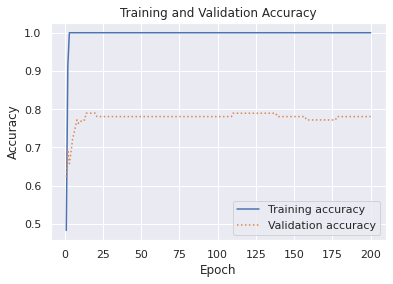

In [ ]:
from re import template
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
best_max = 0.7
scores = []
learning_rate = [0.0003, 0.00038, 0.0004,0.001]
for lr in learning_rate:
  op = tf.keras.optimizers.Adam(learning_rate=lr)
  #model = tf.keras.Sequential([ keras.layers.Dense(units=1, input_shape=[3392])])
  model = tf.keras.models.Sequential([ tf.keras.layers.Dense(400, activation=tf.nn.relu), tf.keras.layers.Dense(units=1, input_shape=[3392])])
  model.add(Dense(1, activation='sigmoid')) 

  model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

  temp = model.fit(train, y2, epochs=200, validation_data=(test, yy2), batch_size=100)
  l, max_ = model.evaluate(test, yy2)
  if max_ > best_max:
    best_max = max_
    hist = temp
  scores.append( (lr, max_))
  

print(scores)
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Epoch 1/200
3/3 [==============================] - 2s 249ms/step - loss: 0.6988 - accuracy: 0.4867 - val_loss: 0.6750 - val_accuracy: 0.6053
Epoch 2/200
3/3 [==============================] - 0s 46ms/step - loss: 0.6597 - accuracy: 0.5741 - val_loss: 0.6703 - val_accuracy: 0.5965
Epoch 3/200
3/3 [==============================] - 0s 67ms/step - loss: 0.6278 - accuracy: 0.6160 - val_loss: 0.6632 - val_accuracy: 0.6053
Epoch 4/200
3/3 [==============================] - 0s 63ms/step - loss: 0.6001 - accuracy: 0.6578 - val_loss: 0.6575 - val_accuracy: 0.6404
Epoch 5/200
3/3 [==============================] - 0s 46ms/step - loss: 0.5741 - accuracy: 0.7148 - val_loss: 0.6538 - val_accuracy: 0.6140
Epoch 6/200
3/3 [==============================] - 0s 61ms/step - loss: 0.5499 - accuracy: 0.7757 - val_loss: 0.6504 - val_accuracy: 0.6053
Epoch 7/200
3/3 [==============================] - 0s 60ms/step - loss: 0.5278 - accuracy: 0.8099 - val_loss: 0.6465 - val_accuracy: 0.6228
Epoch 8/200
3/3 [==

[]

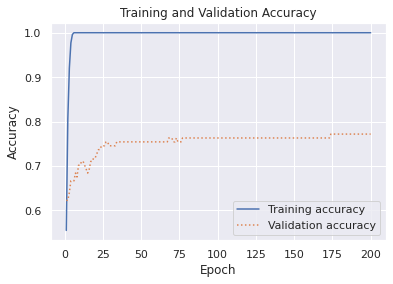

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set()
best_max = 0.6
scores = []

# Select the ones you want
train_feature_important= train[feature_important ]


test_feature_important= test[feature_important ]

scores = []
learning_rate = [0.0001, 0.00035, 0.0004,0.001]

for lr in learning_rate:
  op = tf.keras.optimizers.Adam(learning_rate=lr)
  #model = tf.keras.Sequential([ keras.layers.Dense(units=1, input_shape=[3392])])
  model_feature_important = tf.keras.models.Sequential([ tf.keras.layers.Dense(300, activation=tf.nn.relu), tf.keras.layers.Dense(units=1, input_shape=[1500])])
  model_feature_important.add(Dense(1, activation='sigmoid')) 

  model_feature_important.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

  temp = model_feature_important.fit(train_feature_important, y2, epochs=200, validation_data=(test_feature_important, yy2), batch_size=100)
  l, max_ = model_feature_important.evaluate(test_feature_important, yy2)
  if max_ > best_max:
    best_max = max_
    hist = temp
  scores.append( (lr, max_))

print(scores)
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


[0.00013877 0.00062867 0.00024682 ... 0.00306233 0.         0.        ]


[]

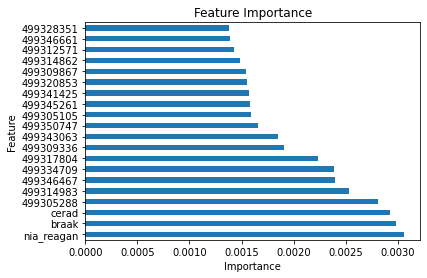

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

modelf2 = ExtraTreesClassifier()
modelf2.fit(train,y2)
print(modelf2.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelf2.feature_importances_, index=train.columns)
feat_importances.nlargest(20).plot(kind='barh')
modelf2.score(test, yy2)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.plot()

In [ ]:
print(sum(y2)/len(y2))
print(sum(yy2)/len(yy2))

0.4144486692015209
0.37719298245614036


In [ ]:

pca = PCA(.95) #choosing the features that contribute to 95% of var
print(np.shape(train))
train_new = scaler.fit_transform(train)

train_new = pca.fit_transform(train_new) #using principal component analysis

#finding out how much of the variance each pca explains
var = pca.explained_variance_ratio_

print(np.shape(train_new))


# yy1 = test['Dementia']
# yy2 = test['Alzheimer']
# del test['Dementia']
# del test['Alzheimer']
test_new= scaler.fit_transform(test)

test_new = pca.transform(test_new) #using principal component analysis

print(abs( pca.components_ ))
#we can know how much each feature contributes to each pca
pca_contribs = abs( pca.components_ )

fimp = feat_importances.nlargest(2000)
feature_important = list(fimp.index.values) #1000 most important features
print(len(feature_important))

2000


best model seen so far is Adam with loss(f) =  sparse_categorical_crossentropy epochs :  150 @ a learning rate of lr 0.001 accuracy of  0.7368420958518982

In [ ]:
def myplot(score,coeff,y, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 1.0)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')


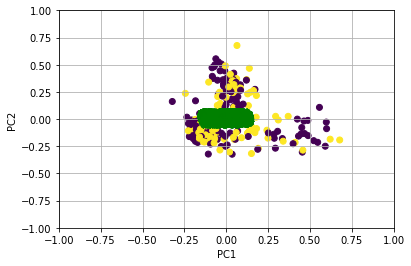

In [ ]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("Principal Component{}".format(1))
plt.ylabel("Principal Component{}".format(2))

plt.set_title('PCA of 3', fontsize = 20)
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(train_new[:,0:2], np.transpose(pca.components_[0:2, :]),y2 )
plt.show()

In [ ]:

pca = PCA(0.95) #choosing the features that contribute to 95% of var
print(np.shape(train))
train_new = scaler.fit_transform(train)

train_new = pca.fit_transform(train_new) #using principal component analysis

#finding out how much of the variance each pca explains
var = pca.explained_variance_ratio_

print(np.shape(train_new))

test_new= scaler.fit_transform(test)

test_new = pca.transform(test_new) #using principal component analysis

print(abs( pca.components_ ))
#we can know how much each feature contributes to each pca
pca_contribs = abs( pca.components_ )

(263, 3392)
(263, 263)
[[0.00297151 0.0038163  0.00405475 ... 0.00202782 0.         0.        ]
 [0.00107398 0.00345944 0.00132496 ... 0.00058637 0.         0.        ]
 [0.00241732 0.00693141 0.00787275 ... 0.0081067  0.         0.        ]
 ...
 [0.01412132 0.01325698 0.00883274 ... 0.00787329 0.         0.        ]
 [0.02502406 0.03406795 0.00784305 ... 0.01811526 0.         0.        ]
 [0.24217757 0.18343775 0.04513028 ... 0.01030314 0.         0.        ]]


Epoch 1/200
3/3 [==============================] - 2s 243ms/step - loss: 1.2447 - accuracy: 0.5437 - val_loss: 0.8215 - val_accuracy: 0.5263
Epoch 2/200
3/3 [==============================] - 0s 67ms/step - loss: 0.9964 - accuracy: 0.6046 - val_loss: 0.7851 - val_accuracy: 0.5526
Epoch 3/200
3/3 [==============================] - 0s 27ms/step - loss: 0.7942 - accuracy: 0.6692 - val_loss: 0.7518 - val_accuracy: 0.5614
Epoch 4/200
3/3 [==============================] - 0s 70ms/step - loss: 0.6417 - accuracy: 0.7262 - val_loss: 0.7278 - val_accuracy: 0.5965
Epoch 5/200
3/3 [==============================] - 0s 44ms/step - loss: 0.5088 - accuracy: 0.8061 - val_loss: 0.7058 - val_accuracy: 0.5965
Epoch 6/200
3/3 [==============================] - 0s 18ms/step - loss: 0.4019 - accuracy: 0.8631 - val_loss: 0.6858 - val_accuracy: 0.6053
Epoch 7/200
3/3 [==============================] - 0s 19ms/step - loss: 0.3153 - accuracy: 0.9049 - val_loss: 0.6701 - val_accuracy: 0.6228
Epoch 8/200
3/3 [==

[]

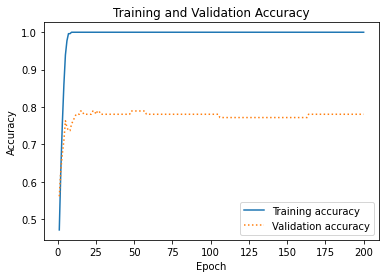

In [ ]:
learning_rate = [ 0.00025,0.0003, 0.00035, 0.0004, 0.00045, 0.0005, 0.001] 
best_max = 0.0
scores = [] 
for lr in learning_rate:
  op = tf.keras.optimizers.Adam(learning_rate=lr)
  #model = tf.keras.Sequential([ keras.layers.Dense(units=1, input_shape=[3392])])
  model_feature_important = tf.keras.models.Sequential([ tf.keras.layers.Dense(300, activation=tf.nn.relu), tf.keras.layers.Dense(units=1, input_shape=[215])])
  model_feature_important.add(Dense(1, activation='sigmoid')) 

  model_feature_important.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

  temp = model_feature_important.fit(train_new, y2, epochs=200, validation_data=(test_new, yy2), batch_size=100)
  l, max_ = model_feature_important.evaluate(test_new, yy2)
  if max_ > best_max:
    best_max = max_
    hist = temp
  scores.append( (lr, max_))

print(scores)
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


best model seen using PCA, so far is Adam with loss(f) =  sparse_categorical_crossentropy @ a learning rate of lr 0.00025 accuracy of  0.640350878238678

In [ ]:
variance = pca.explained_variance_ratio_
index = [i for i in range(263)]
print((variance))

[1.27288606e-01 6.69411021e-02 4.39297477e-02 3.74512049e-02
 2.44576849e-02 1.68485813e-02 1.31247043e-02 1.17519828e-02
 1.09327145e-02 9.28376048e-03 8.19776123e-03 7.96966837e-03
 7.86223819e-03 7.40426521e-03 6.97280404e-03 6.54159064e-03
 6.48968205e-03 6.27818987e-03 6.20336111e-03 5.76648407e-03
 5.55995165e-03 5.54500102e-03 5.51599196e-03 5.36466681e-03
 5.18722131e-03 5.07991146e-03 4.91107861e-03 4.82152624e-03
 4.74100072e-03 4.72967054e-03 4.65317304e-03 4.60623561e-03
 4.55662612e-03 4.49831860e-03 4.47194606e-03 4.45920859e-03
 4.41554011e-03 4.29107628e-03 4.23177432e-03 4.17862155e-03
 4.14734468e-03 4.12929311e-03 4.07515485e-03 4.02097421e-03
 3.98245322e-03 3.92601246e-03 3.89710435e-03 3.86954050e-03
 3.85296937e-03 3.82601201e-03 3.79054776e-03 3.75377391e-03
 3.71661866e-03 3.69003103e-03 3.65974777e-03 3.59698903e-03
 3.57504444e-03 3.52865950e-03 3.52470642e-03 3.50116279e-03
 3.47484536e-03 3.42241683e-03 3.41750357e-03 3.40247189e-03
 3.37116869e-03 3.327770

No handles with labels found to put in legend.


[]

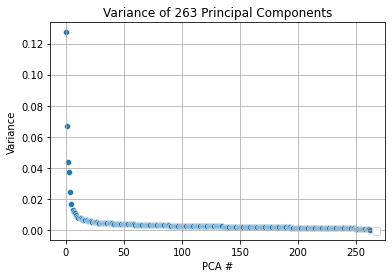

In [ ]:
sns.scatterplot(x=index,y = variance, sizes=(20, 200))

plt.title('Variance of 263 Principal Components')
plt.xlabel('PCA #')
plt.ylabel('Variance')
plt.legend(loc='lower right')
plt.grid()
plt.plot()

In [ ]:
#print(abs( pca.components_ ))



ans = []
for i in range(10): #looking in the first 10 principal components
  pca_important = pd.Series( abs( pca.components_[i,:] ))
  huh = pca_important.nlargest(10) #finding 10 largest values
  which_features = list(huh.index.values) #naming
  colname = list(train.columns[which_features])
  
  ans += (colname)













print(ans)

['499335632', '499319746', '499343324', '499316477', '499350390', '499335640', '499341116', '499309405', '499338160', '499321470', '499315150', '499349585', '499354251', '499350278', '499329761', '499311697', '499319586', '499320685', '499341039', '499337158', '499334246', '499324217', '499316416', '499353774', '499315152', '499324133', '499316828', '499314026', '499328572', '499315035', '499333256', '499339845', '499351162', '499332266', '499347171', '499316285', '499341807', '499312546', '499305312', '499335532', '499346053', '499347306', '499350653', '499347503', '499342171', '499347093', '499348709', '499343925', '499347180', '499327609', '499345182', '499328791', '499338253', '499333194', '499326576', '499346327', '499339251', '499314311', '499333912', '499316053', '499306751', '499347302', '499306008', '499339651', '499311903', '499339847', '499352348', '499350053', '499331477', '499324452', '499305614', '499331694', '499345848', '499350242', '499305002', '499308342', '499344973'

In [ ]:
f = open("PCA_important.txt", "w")

for a in ans:
  f.write(a + " \n")

f.close()

Index(['499335632', '499319746', '499343324', '499316477', '499350390',
       '499335640', '499341116', '499309405', '499338160', '499321470',
       '499342379', '499325679', '499310380', '499305532', '499306909',
       '499337441', '499333815', '499319835', '499333139', '499343094',
       '499307655', '499329526', '499327563', '499349888', '499308459',
       '499335782', '499328952', '499349616', '499350689', '499327685',
       '499331616', '499332404', '499318344', '499340917', '499338905',
       '499329123', '499317387', '499316272', '499307950', '499314034',
       '499329268', '499304754', '499347902', '499331361', '499306091',
       '499345713', '499325990', '499348884', '499317636', '499353743',
       '499317873', '499326651', '499317892', '499344615', '499305367',
       '499345451', '499324753', '499334352', '499337127', '499351134',
       '499329563', '499313592', '499326514', '499345086', '499336034',
       '499335383', '499350986', '499351548', '499325339', '4993

In [ ]:
#get correlations of each features in dataset

train_feature_important= train[feature_important ]

dataset_small = train_feature_important.merge(y2.to_frame(), left_index=True, right_index=True)
corrmat = dataset_small.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset_small[top_corr_features].corr(),annot=True,cmap="RdYlGn")